<a href="https://colab.research.google.com/github/Kevincancino26/mis-notebook-de-estudio-/blob/main/Clasificacion_primeros_pasos(Clasificaci%C3%B3n%3A%20aprendiendo%20a%20clasificar%20datos%20con%20Machine%20Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clasificación: Primeros pasos**

En este proyecto, analizaremos datos de una campaña de marketing para la adhesión a inversiones. El objetivo es utilizar la información de los datos para predecir si los clientes de un banco invertirán su dinero o no.  

Esta predicción se realizará mediante **machine learning**, y este notebook contendrá los pasos para obtener un modelo capaz de hacer dichas predicciones, desde la **lectura**, **análisis exploratorio**, **separación** y **transformación** de los datos, hasta el **ajuste**, **evaluación** y **comparación** de modelos de clasificación.

# 1. Análisis exploratorio

## Realizando la lectura de los datos

Podemos leer los datos utilizando la biblioteca `pandas`. Por esta razón, importaremos la biblioteca con el comando `import pandas as pd`.  

Dado que el archivo de datos está en formato *csv*, realizaremos la lectura con la función [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

In [1]:
import pandas as pd

In [2]:
datos=pd.read_csv('/content/marketing_inversiones.csv')

In [3]:
datos.head()

,edad,estado_civil,escolaridad,default,saldo,prestatario,ultimo_contacto,ct_contactos,adherencia_inversion
0,45,casado (a),superior,no,242,no,587,1,si
1,42,casado (a),secundaria,no,1289,no,250,4,si
2,23,soltero (a),superior,no,363,no,16,18,no
3,58,divorciado (a),superior,no,1382,no,700,1,si
4,50,casado (a),secundaria,no,3357,no,239,4,si


Para crear modelos de clasificación, necesitamos utilizar datos de calidad, sin inconsistencias y sin datos faltantes. Verificaremos si existen datos nulos y el tipo de datos de cada columna en la base de datos utilizando el método [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html).

In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   edad                  1268 non-null   int64 
 1   estado_civil          1268 non-null   object
 2   escolaridad           1268 non-null   object
 3   default               1268 non-null   object
 4   saldo                 1268 non-null   int64 
 5   prestatario           1268 non-null   object
 6   ultimo_contacto       1268 non-null   int64 
 7   ct_contactos          1268 non-null   int64 
 8   adherencia_inversion  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


## Explorando los datos

Una etapa muy importante en proyectos de *machine learning* es la exploración y comprensión de los datos, conocida como **análisis exploratorio**. Podemos utilizar gráficos para verificar qué información contiene cada una de las columnas de la base de datos, así como identificar inconsistencias y patrones que puedan existir.  

Exploraremos cada una de las columnas de la base de datos utilizando la biblioteca `plotly`. Comenzaremos con las variables categóricas y luego analizaremos las variables numéricas.

para poder ver la distribucion de nuestross datos de acuerdo a nuesstras variables categoricas, podemos usasr un histograma dado que assi podemos de manera vizual ver esta distribucion

### Variables categóricas

In [5]:
import plotly.express as px

In [6]:
px.histogram(datos,x='adherencia_inversion',text_auto=True)#test_auto nos permite tener una caja de informacion para vizualissacion

pero si queremos visualizar el comportamiento de cada una de nuestras variables categoricass con resspecto a nuestra variable respuesta

In [7]:
px.histogram(datos,x='estado_civil',text_auto=True,color='adherencia_inversion',barmode='group')#con esto podemos ver el comportamiento de una variable dependiente y nuestra variable respuesta
#de manera de un grafico de columnas agrupadas en un histograma

tenemoss un grafico donde vissualizamos cuales se agregaron a la inversion de nuesstros clientes y que estado civil tienen

con esto podemos tener una idea general de lo que passas con nuesstros datos. por ejemplo: si es casssado o soltero la mayoria no sse ingresaron a la inversion de acuerdo a sus diferencias, en los divorciados apenas y tuvimos un poco de clientes que se añadieron, de acuerdo a ciertos motivos

In [8]:
px.histogram(datos,x='escolaridad',text_auto=True,color='adherencia_inversion',barmode='group')

lo que vemos es que tenemos mas estudios superiores añadidos con respecto a los otros grupos, esto puede ser un patron con respecto a la diferencia de grado entre los clientes

lo que queremos con esto es hacer que la maquina aprenda y nos de su analisis o opinion de los datos asi como nosotrs lo hacemos al analisar la grafica

In [9]:
px.histogram(datos,x='default',text_auto=True,color='adherencia_inversion',barmode='group')

In [10]:
px.histogram(datos,x='prestatario',text_auto=True,color='adherencia_inversion',barmode='group')

con esto podemos ver un analisis de las variables categorias y sacar un estimado de comportamiento de los datos

### Variables numéricas

compracion de variables nuemricass con nuesstra variable

In [11]:
px.box(datos,x='edad',color='adherencia_inversion')

nos permite identificar patrones desde los datos de estadisticca descriptiva y ver loss valores atipicos para que nuestro maquina nose detenga por los datos atipicos dado que loss podemos quitar

In [12]:
px.box(datos,x='saldo',color='adherencia_inversion')

In [13]:
px.box(datos,x='ultimo_contacto',color='adherencia_inversion')

In [14]:
px.box(datos,x='ct_contactos',color='adherencia_inversion')

#### ¿qué es Machine Learning?

El Inteligencia Artificial (IA) se ha destacado como una de las áreas de mayor crecimiento y visibilidad en los últimos años. Es un campo de estudio amplio que abarca diversas áreas del conocimiento, tanto prácticas como teóricas, incluyendo la ciencia de la computación, la ciencia cognitiva, la filosofía de la mente y el Machine Learning (Aprendizaje Automático).

El Machine Learning (ML), como una subárea de la inteligencia artificial, se concentra en el desarrollo de algoritmos que son utilizados en la computadora para realizar tareas sin la necesidad de programar explícitamente las reglas que se utilizarán. Estos algoritmos basan sus decisiones a partir de datos con el objetivo de comprender e identificar el patrón existente en esos datos, para luego utilizar ese conocimiento en la realización de predicciones.

Cómo funciona el Machine Learning
El funcionamiento del Machine Learning tiene 3 etapas principales:

1 - Recolección de datos

La primera etapa de un proyecto de ML es la extracción o recolección de datos. Los datos son esenciales y pueden considerarse la materia prima de los algoritmos. La cantidad y calidad de estos datos tienen un impacto muy grande en el aprendizaje de los modelos. Con pocos datos, el modelo puede no tener información suficiente para aprender. Con datos de poca calidad, el modelo puede no ser capaz de diferenciar bien el patrón de los datos o comprender el patrón de manera diferente a lo que ocurre con los datos del mundo real.

2 - Entrenamiento de los modelos

Después de recolectar datos y asegurar que tienen calidad, se llega a la etapa de entrenar los modelos. El entrenamiento consiste en que el algoritmo busque el patrón presente en los datos y construya una regla para tomar decisiones posteriormente en nuevos datos.

3 - Evaluación

Con el modelo entrenado, se llega a la etapa de evaluar el desempeño del modelo, para identificar si realmente aprendió el patrón de los datos y si es capaz de aplicar de forma satisfactoria la regla generada por el algoritmo en datos nuevos, que no fueron utilizados durante el momento del entrenamiento.

A pesar de ser las etapas principales, estas no son las únicas tareas presentes en proyectos de Machine Learning. Cada proyecto tiene sus propias características, ya sea por el formato y naturaleza de los datos, el tipo de aplicación o los desafíos encontrados a lo largo del proceso.

####¿qué es clasificación?

Dentro del área de Machine Learning, existen diferentes tipos de aprendizaje: el supervisado, semi supervisado, no supervisado y por refuerzo. La tarea de clasificación es solo una entre las tareas realizadas por los algoritmos, que forma parte del aprendizaje supervisado. Con el organigrama a continuación, observa los flujos que se establecen en estas relaciones.

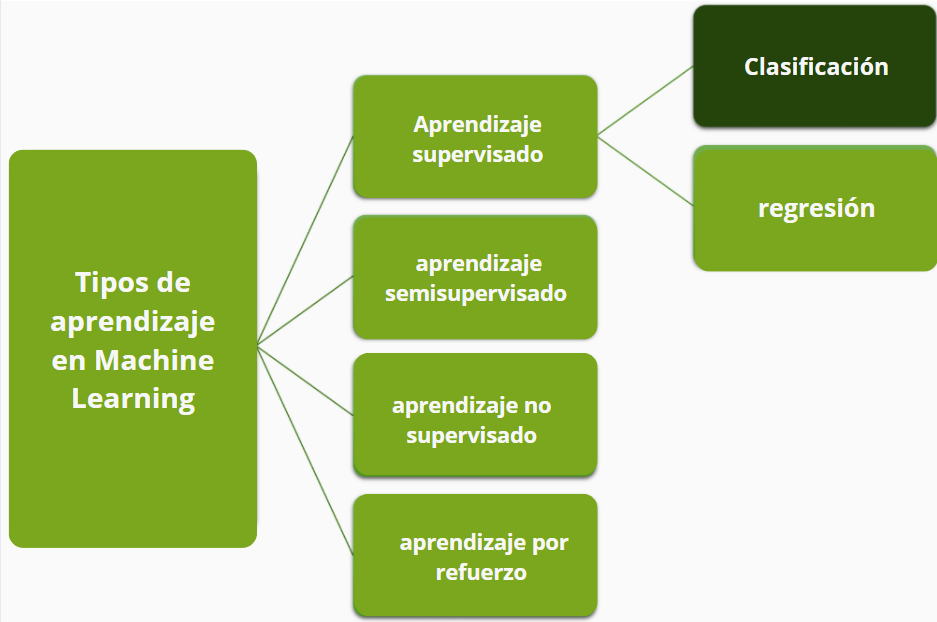

Imagina un grupo de jóvenes que está aprendiendo a identificar diferentes estilos musicales. Tienen un mentor que posee una colección de canciones en su dispositivo de audio, cada una debidamente etiquetada con el género musical correspondiente, pero los jóvenes no pueden distinguir los géneros musicales por sí mismos. Al principio, el mentor comienza a reproducir varias canciones y, al mismo tiempo, dice cuál es el género de cada una de ellas. Ellos escuchan con atención y, a lo largo del tiempo, comienzan a asociar las características musicales, como el ritmo, la instrumentación y los vocales, a los diferentes géneros.

En este ejemplo, los jóvenes se basan en algunas características como ritmos rápidos y vocales enérgicos que encajan en el género pop, mientras que las canciones con guitarras distorsionadas y vocales más intensos se dirigen al género rock. Con base en este proceso, los jóvenes logran identificar el género de nuevas canciones que no fueron previamente etiquetadas por el mentor, pero usando las reglas que aprendieron, fueron capaces de etiquetar y nombrar los nuevos elementos.

El aprendizaje supervisado en Machine Learning sigue este mismo razonamiento. Utiliza conjuntos de datos etiquetados, es decir, bases de datos con registros históricos que contienen la respuesta correcta en cada uno de los registros. Para entonces, a partir de esta respuesta y de las características de los datos, el algoritmo puede trazar una regla para llegar a la respuesta que podrá ser utilizada posteriormente en nuevos datos, con el fin de hacer una predicción.

La característica principal de la clasificación se da por el tipo de dato presente en la respuesta, que debe ser del tipo categórica. Un dato del tipo categórico es aquel que tiene diferentes clases o categorías. Como ejemplos de aplicaciones de clasificación con Machine Learning, tenemos:

* Filtrado de correos electrónicos spam
* Diagnósticos médicos
* Análisis textual de sentimientos
* Detección de fraudes bancarios

#### tipos de variables

En una base de datos utilizada en proyectos de Machine Learning, podemos llamar a las columnas variables. Este concepto, proveniente de la estadística, representa una característica de interés que se mide en cada elemento de una muestra o población. El nombre indica que el valor varía de elemento a elemento, pudiendo tener valores numéricos o no numéricos.

Las variables se dividen de la siguiente forma:

* Variables cuantitativas o numéricas
Son características que pueden ser medidas a partir de valores numéricos que tienen sentido y se dividen entre variables discretas y continuas.

* Variables discretas: características medidas solo por un número finito o contable de valores. Solo tiene sentido para valores enteros. Por ejemplo: número de hijos, número de ventas.
* Variables continuas: características medidas que asumen valores en una escala continua (en la recta real), en la que tienen sentido valores fraccionarios. Ejemplo: peso, tiempo, altura.
* Variables cualitativas o categóricas
Son características que no poseen valores cuantitativos y se definen por varias categorías o clases. Se dividen en nominales y ordinales.

* Variables nominales: no existe ordenación entre las categorías. Ejemplo: sexo biológico, país, churn.
* Variables ordinales: existe una ordenación entre las categorías. Ejemplo: escolaridad, mes.

Atención: Un punto importante a tratar es que no siempre una variable representada por números es cuantitativa.


Por eso, es esencial tener una postura crítica y evaluar la información detrás del dato, y no solo fijarse en la forma en que está disponible. Por ejemplo, una información de ID de registro puede ser un número, sin embargo, su función está en categorizar un elemento. De la misma forma, una información de escolaridad puede estar representada con los valores 1, 2 y 3, y aun así no los transforma en una variable numérica. Esta información no puede ser utilizada para hacer sumas y calcular promedios, por ejemplo.

### ¿Qué aprendimos?

En esta clase, aprendiste a:

* Identificar la variable objetivo en un conjunto de datos;
* Verificar la presencia de datos nulos e inconsistentes;
* Realizar el análisis exploratorio de datos utilizando gráficos.

# 2. Tranformación de los datos

## Variables explicativas y variable de respuesta

Para realizar la predicción de los valores con un modelo de aprendizaje automático, necesitamos separar la variable objetivo de las variables explicativas. La variable **y** representa lo que queremos predecir, mientras que **x** incluye todas las variables que se utilizarán para explicar el comportamiento de **y**.

In [15]:
datos

,edad,estado_civil,escolaridad,default,saldo,prestatario,ultimo_contacto,ct_contactos,adherencia_inversion
0,45,casado (a),superior,no,242,no,587,1,si
1,42,casado (a),secundaria,no,1289,no,250,4,si
2,23,soltero (a),superior,no,363,no,16,18,no
3,58,divorciado (a),superior,no,1382,no,700,1,si
4,50,casado (a),secundaria,no,3357,no,239,4,si
...,...,...,...,...,...,...,...,...,...
1263,52,soltero (a),superior,no,83,no,1223,6,si
1264,35,soltero (a),superior,no,5958,no,215,1,si
1265,30,soltero (a),superior,no,-477,si,1532,2,si
1266,42,casado (a),superior,no,2187,no,525,3,si


con esto separamos las variables explicativas y la varibale respuesta

In [16]:
X=datos.drop('adherencia_inversion',axis=1)
y=datos['adherencia_inversion']

In [17]:
X.head()

,edad,estado_civil,escolaridad,default,saldo,prestatario,ultimo_contacto,ct_contactos
0,45,casado (a),superior,no,242,no,587,1
1,42,casado (a),secundaria,no,1289,no,250,4
2,23,soltero (a),superior,no,363,no,16,18
3,58,divorciado (a),superior,no,1382,no,700,1
4,50,casado (a),secundaria,no,3357,no,239,4


In [18]:
y.head()

,adherencia_inversion
0,si
1,si
2,no
3,si
4,si


## Transformando las variables explicativas

Los algoritmos de aprendizaje automático no comprenden datos en formato de texto, por lo que debemos transformar los datos a un formato numérico para que el algoritmo pueda interpretar la información. Esta transformación debe realizarse de manera que no altere la información original del conjunto de datos, por lo que no basta con simplemente cambiar los valores a números aleatorios.

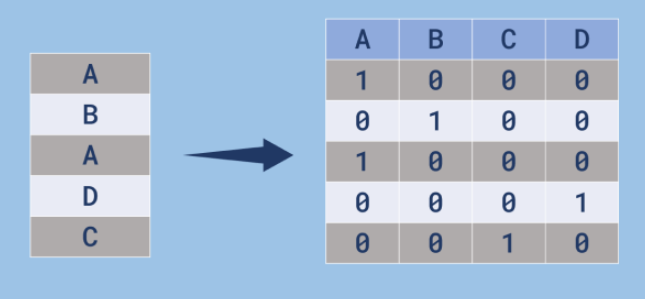

para no darle mas peso a una variable que otra al transformarla en valores nuemricos, vamos autilizar el metodo one hot en code, consiste dar el valor de uno una caracteristica y los de mas 0, como en la imagen de ejemplo

nos apoyalleremos en dos recursos de skill learn

In [19]:
from sklearn.compose import make_column_transformer #es un transformador de columnas, nos ayuda a generar un transformador de columnas
from sklearn.preprocessing import OneHotEncoder #nos ayuda como nosostros queremos hacer la transformacion de nuestro data frame explicativas

In [20]:
columnas=X.columns

In [21]:
One_hot=make_column_transformer((OneHotEncoder(drop='if_binary')
                                ,['estado_civil','escolaridad','default','prestatario'])
                                ,remainder='passthrough',sparse_threshold=0,force_int_remainder_cols=False)#lo ponemos en una tupla donde colocaremos el modelo que queremos para hacer la codificacion, pero no solo queremos aplicar en todas las columnas, si no hacerlo especifico o ignorar las que no son
#para que no nos llene de ceros inecesarios, el ultimo parametro nos permite indicar ceros en una matriz relevante, es decir nos permite determinar una matriz esparsa lleando de 0 y algunos valores de 1, quitando informacion relevante y ponerlo en cero nos permite que no quite informacion relevante
#force_int_remainder_cols, se implemento resientemente y hace obligatorio que se cambie a entero el nombre de la columna

In [22]:
X=One_hot.fit_transform(X)#la que hacemos es colocar la transformacion en nuestras variables explicativas en seleccion de las columnas especificadas


In [23]:
One_hot.get_feature_names_out(columnas)#nos mostrara un array con los nombres de las columnas, donde asigna uno para si y 0 para no, y las que son remainder las dejo intanctas

array(['onehotencoder__estado_civil_casado (a)',
       'onehotencoder__estado_civil_divorciado (a)',
       'onehotencoder__estado_civil_soltero (a)',
       'onehotencoder__escolaridad_primaria',
       'onehotencoder__escolaridad_secundaria',
       'onehotencoder__escolaridad_superior', 'onehotencoder__default_si',
       'onehotencoder__prestatario_si', 'remainder__edad',
       'remainder__saldo', 'remainder__ultimo_contacto',
       'remainder__ct_contactos'], dtype=object)

In [24]:
X

array([[ 1.000e+00,  0.000e+00,  0.000e+00, ...,  2.420e+02,  5.870e+02,
         1.000e+00],
       [ 1.000e+00,  0.000e+00,  0.000e+00, ...,  1.289e+03,  2.500e+02,
         4.000e+00],
       [ 0.000e+00,  0.000e+00,  1.000e+00, ...,  3.630e+02,  1.600e+01,
         1.800e+01],
       ...,
       [ 0.000e+00,  0.000e+00,  1.000e+00, ..., -4.770e+02,  1.532e+03,
         2.000e+00],
       [ 1.000e+00,  0.000e+00,  0.000e+00, ...,  2.187e+03,  5.250e+02,
         3.000e+00],
       [ 0.000e+00,  0.000e+00,  1.000e+00, ...,  1.900e+01,  1.100e+02,
         2.000e+00]])

nuestra variable queda como valores numericos pero no sabemos como o que significan por eso usamos la funcion anterios de get_fature ... para ver los nombres de los valores... lo que vamos hacer es crear un dataframe con los valores anteriore sy las columnas utilizando :

In [25]:
pd.DataFrame(X,columns=One_hot.get_feature_names_out(columnas))

,onehotencoder__estado_civil_casado (a),onehotencoder__estado_civil_divorciado (a),onehotencoder__estado_civil_soltero (a),onehotencoder__escolaridad_primaria,onehotencoder__escolaridad_secundaria,onehotencoder__escolaridad_superior,onehotencoder__default_si,onehotencoder__prestatario_si,remainder__edad,remainder__saldo,remainder__ultimo_contacto,remainder__ct_contactos
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0,242.0,587.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,1289.0,250.0,4.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23.0,363.0,16.0,18.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,58.0,1382.0,700.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,3357.0,239.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,52.0,83.0,1223.0,6.0
1264,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35.0,5958.0,215.0,1.0
1265,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,30.0,-477.0,1532.0,2.0
1266,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,42.0,2187.0,525.0,3.0


ahora tenemos un dataframe con los valores que fueron asignados, donde vemos que donde era no=0 y donde era si=1

con esto ya tenemos la transformacion necesaria para nuestras variables explicativas

## Transformando la variable respuesta

Así como las variables explicativas, la variable objetivo también debe convertirse al formato numérico. Podemos representar una variable objetivo binaria como 0 o 1, donde 0 indica la ausencia de la característica de la variable y 1 representa su presencia.

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
label_encoder=LabelEncoder()

In [28]:
y=label_encoder.fit_transform(y)

In [29]:
y

array([1, 1, 0, ..., 1, 1, 1])

de esta manera tenemos nuestra variable de respuesta en un array unidimencional y nuestras variables explocativas en un array bidimencional o en una matriz

#### biblioteca Scikit-Learn

Además de los datos, hay algo que se vuelve indispensable en los proyectos de Machine Learning, que son los algoritmos. Es claro que no necesitamos crear los algoritmos desde cero, están disponibles de forma gratuita a través de una biblioteca del lenguaje Python, Scikit-Learn. Esta ofrece no solo una amplia variedad de algoritmos, sino también herramientas de preprocesamiento de datos, análisis y evaluación de modelos.

Uno de los puntos más positivos de la biblioteca es su documentación, que está bien organizada y tiene una navegación intuitiva. Contiene la explicación y ejemplos de uso de todas las funciones, además de información teórica sobre diversos temas relacionados con Machine Learning. La documentación sin duda debe formar parte del día a día de la persona científica de datos, desde el nivel inicial hasta el más avanzado de conocimiento.

El otro punto ventajoso de esta biblioteca es su uso simple. Con pocas líneas de código es posible entrenar un modelo, abstraiendo todos los detalles complejos que ocurren detrás de escena. Por esta razón, se ha convertido en una de las principales bibliotecas para trabajar con datos y, sobre todo, Machine Learning.

https://scikit-learn.org/stable/index.html

####One Hot Encoding

Los algoritmos de Machine Learning no pueden comprender información que no esté en formato numérico. Por lo tanto, si se desea utilizar variables categóricas en modelos, es necesario que pasen por algún tipo de tratamiento para que estén en formato numérico. Esto no significa que se convertirán en variables numéricas, solo que estarán en un formato que sea comprendido por los modelos.

Así, estas transformaciones deben preservar la información real de las categorías de la mejor manera posible, sin introducir sesgos en el modelo y sin información que esté alejada de la realidad.

La forma ideal de hacer este tipo de transformación, que mantiene la información original, se conoce como one hot encoding. Esta acción transforma cada una de las clases de las variables categóricas en nuevas columnas, utilizando el valor 0 para representar la ausencia de la característica y 1 para la presencia de la característica en la muestra de la base de datos. Observa en detalle el dinamismo de este proceso en la imagen a continuación.

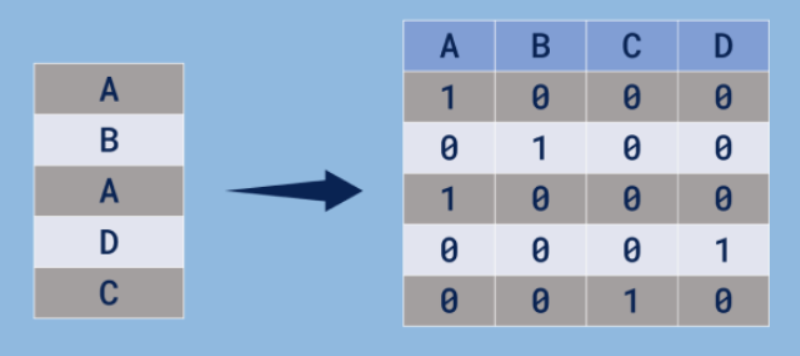

Hay una forma muy simple de hacer esta transformación usando la biblioteca pandas, a partir de la función pd.get_dummies(), sin embargo, no es un método muy recomendado cuando estamos trabajando con Machine Learning, ya que esta función no puede abstraer y ejecutar la misma transformación para un nuevo dato. Si tienes una nueva información que pertenece solo a una de las clases de una variable objetivo, el proceso de get_dummies no será capaz de generar las otras columnas provenientes de las otras clases. Esto se convierte en un problema para el modelo, ya que espera todas las características para realizar una predicción.

El método más recomendado para realizar la transformación en proyectos de Machine Learning es el OneHotEncoder. En un primer momento, con los datos iniciales, comienza su acción comprendiendo las características de los datos y genera las nuevas columnas para cada clase. Además, almacena la regla capaz de hacer este procedimiento para nuevos datos. Por lo tanto, en el proceso de transformación de un nuevo dato, puede crear todas las columnas necesarias, aunque este nuevo dato tenga solo la información de una de las clases.

###¿Qué aprendimos?

En esta clase, aprendiste a:

* Utilizar la biblioteca Scikit-Learn para hacer transformaciones de datos;
* Hacer la separación de las variables explicativas y la variable objetivo;
* Realizar la transformación de variables categóricas a formato numérico con one hot encoding;
* Transformar la variable objetivo a formato numérico con el LabelEncoder.

# 3 Ajustando modelos

nota:
antes de hacer un modelo de machine laerning debemos secmentar nuestro modelo en dos uno de prueba y otro para entrenamiento

entrenamiento: mosstraremos al modelo cual es la repsuesta con lass variabless explicativas entrenamois al modelo para que sepa como encontrar la respuesta, duarnte la ejecucion, y el aprendisaje mediante la clasificacion, una forma de aprendisaje automatico, donde essta viendo la salida a la hora de entrenar

donde el allara patrones de respuesta que puedan justificar esas salidas, es decri si este camino la respuesta es 1 sera uno o sera 0, me diante lo patrones de entrenamiento.

lueo del entrenamiento ess probarlo con datos que nunca vio para saber si los genera correctamente o no dado que si seguimos con los datos el modelo se puede aprender las missmas salidas y al momento de ver datos nuevos no encuentr ningun patron poer ser datos que nunca vio.

## Dividiendo los datos entre entrenamiento y prueba

Para comprender si el modelo realmente está aprendiendo de los datos, necesitamos hacer una separación de los datos entre entrenamiento y prueba. Los datos de **entrenamiento** se utilizan para ajustar el modelo, mientras que los datos de **prueba** sirven para verificar el aprendizaje del modelo en datos que no fueron utilizados en el momento del ajuste.

<a href="https://ibb.co/2749Chh3"><img src="https://i.ibb.co/Y7sC1QQB/train-test.png" alt="train-test" border="0"></a>

los datos los dividiremos en un % de prueba y uno para el modelo usando la siguiente biblioteca o modulo

In [31]:
from sklearn.model_selection import train_test_split

procedemos a separar loss array en base de entrenamiento y de prueba

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=5)

## Modelo de referencia - Baseline

El modelo más simple de clasificar los datos es simplemente utilizar un algoritmo que asigna todas las clasificaciones a la clase que tiene mayor frecuencia. Este algoritmo sirve como un criterio de comparación para identificar si los otros modelos tienen un rendimiento mejor que la clasificación más simple posible.

## Árboles de Decisión

El modelo de árbol de decisión es muy utilizado debido a su alta **explicabilidad** y **procesamiento rápido**, manteniendo un rendimiento bastante interesante.

Se basa en decisiones simples tomadas por el algoritmo, separando los datos mediante comparaciones de **menor** y **mayor** en los valores de las columnas de la base de datos.

```python
valores_columnas = ['casado (a)',
                'divorciado (a)',
                'soltero (a)',
                'primaria',
                'secundaria',
                'superior',
                'default',
                'prestatario',
                'edad',
                'saldo',
                'ultimo_contacto',
                'ct_contactos']
```

# 4. Selección de modelos

## Normalizando los datos

Algunos algoritmos pueden asignar un mayor peso a los valores de las variables debido a la escala de los valores y no por la importancia de la clasificación de la variable objetivo. Por ejemplo, en una base de datos con las columnas **edad** y **salario**, el algoritmo puede dar un mayor peso de decisión a los valores del salario simplemente por estar en una escala mayor que los valores de la edad, y no porque la variable salario sea más importante que la variable edad.

En estos casos, necesitamos realizar una transformación en los datos para que estén en una misma escala, evitando que el algoritmo sea influenciado incorrectamente por los valores numéricos divergentes entre las variables.

$X_{sc} = \frac{X - X_{min}}{X_{max} - X_{min}} $

## KNN

El algoritmo KNN se basa en el cálculo de la distancia entre los registros de la base de datos y busca elementos que estén cerca unos de otros (vecinos) para tomar la decisión de clasificación.

Debido a que utiliza cálculos de distancia, este algoritmo está influenciado por la escala de las variables, y por eso es necesario realizar una transformación en los datos antes de utilizar este método.

## Escogiendo y serializando el mejor modelo

Al final de un proyecto de machine learning, debemos comparar los resultados de los modelos y elegir el que tenga el mejor rendimiento.

Podemos almacenar el modelo en un archivo serializado del tipo pickle para que sea utilizado en producción, es decir, en datos del mundo real para atender las necesidades del problema que necesita ser resuelto.

```python
nuevo_dato = {
    'edad': [45],
    'estado_civil':['soltero (a)'],
    'escolaridad':['superior'],
    'default': ['no'],
    'saldo': [23040],
    'prestatario': ['no'],
    'ultimo_contacto': [800],
    'ct_contactos': [4]
}
```